## Exploratory Data Analisys
Izquierda Diario

### Load tokens
"izquierda diario" tokens

In [77]:
import pandas as pd
import numpy as np
import pickle

In [78]:
tokens = pd.read_pickle('tokens/topic_tokens_izq_new.pkl')

### Tf IDf Scores

#### TfIDf Transformation

In [79]:
from sklearn.feature_extraction.text import TfidfTransformer

In [80]:
tfidf_inf = TfidfTransformer().fit_transform(tokens[tokens.topics == 'inflation'].drop('topics', axis=1))

In [81]:
tfidf_inf_df = pd.DataFrame(tfidf_inf.todense(), columns = tokens[tokens.topics == 'inflation'].drop('topics', axis=1).columns)

In [82]:
tfidf_ex = TfidfTransformer().fit_transform(tokens[tokens.topics == 'exchange'].drop('topics', axis=1))

In [83]:
tfidf_ex_df = pd.DataFrame(tfidf_ex.todense(), columns = tokens[tokens.topics == 'exchange'].drop('topics', axis=1).columns)

### Visual Representation
#### Tf IDf per document
See top rated terms per document and their scores

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [85]:
plt.rcParams['figure.figsize'] = [20 , 35]

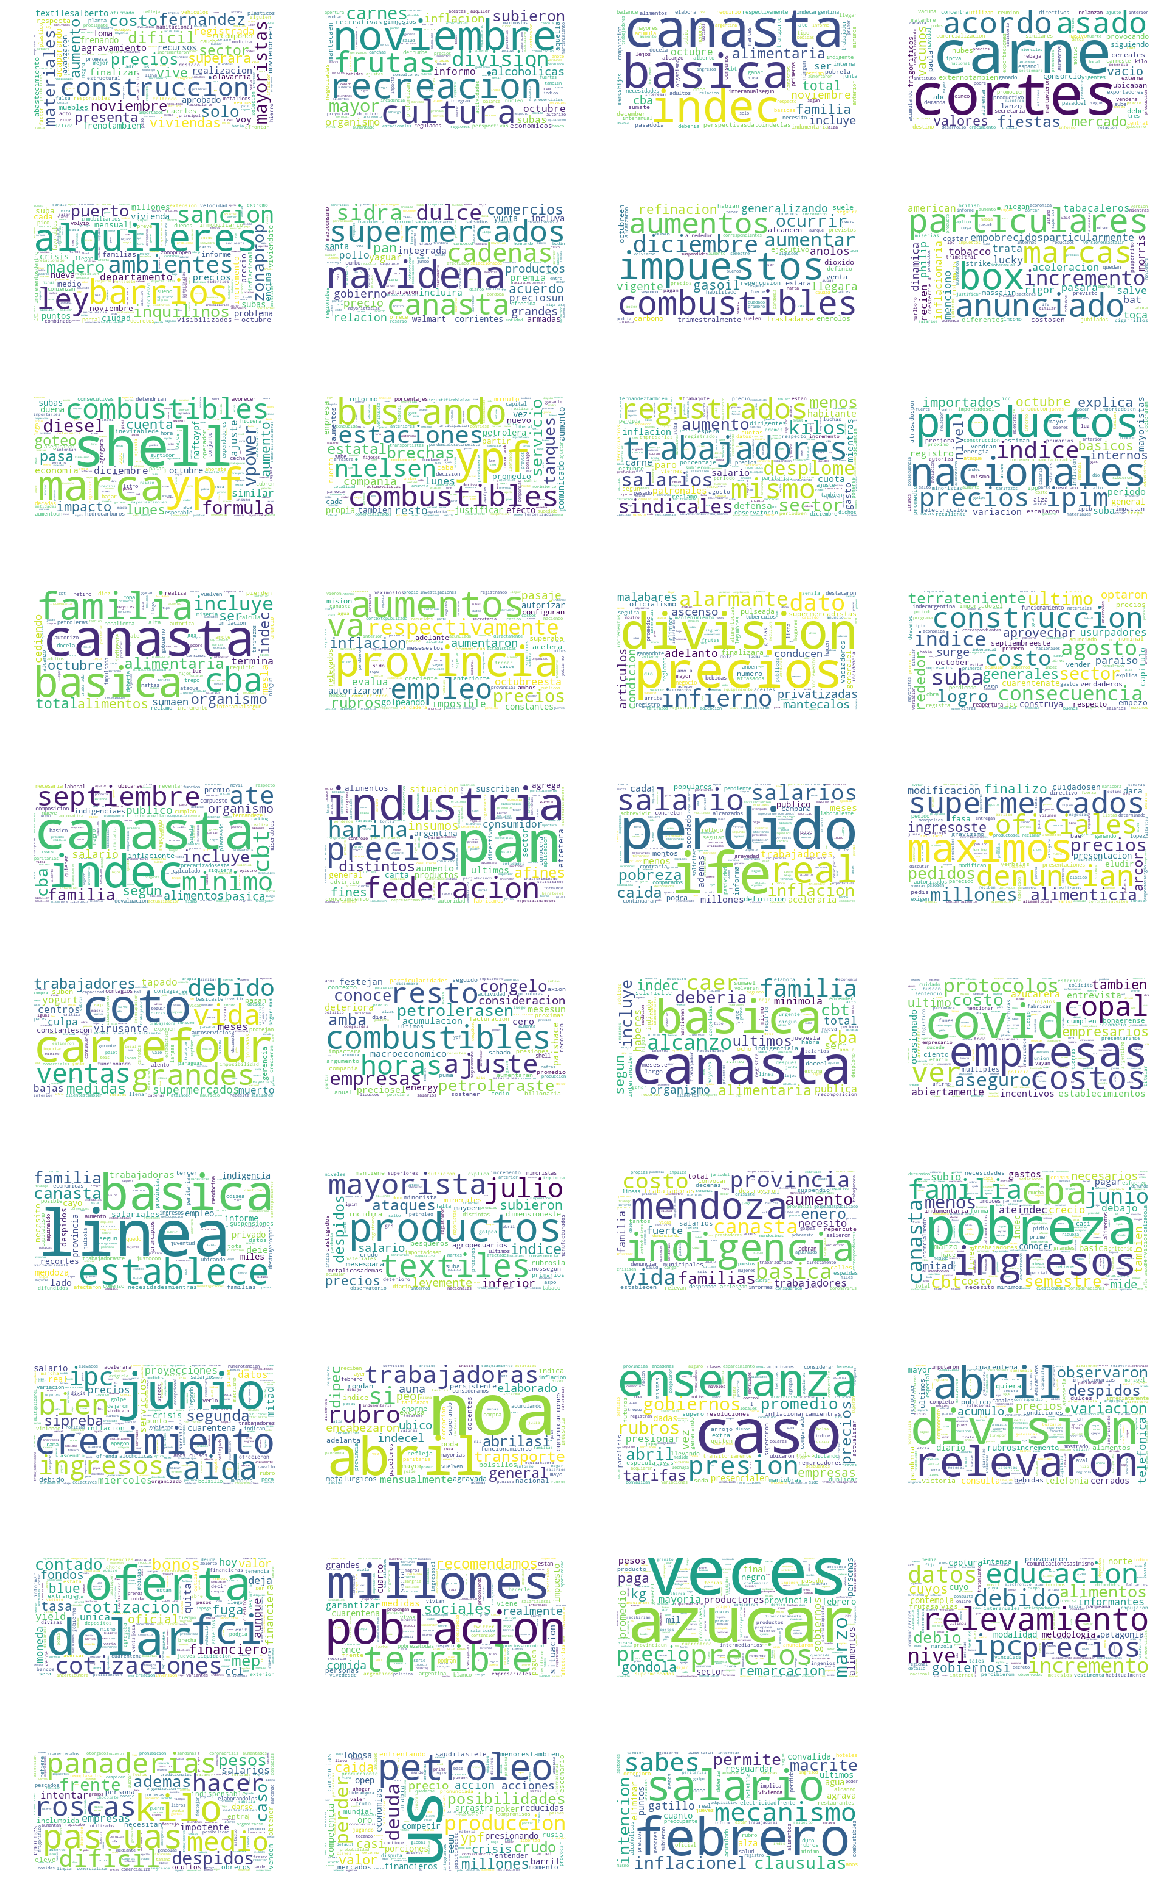

In [86]:
for row in range(tfidf_inf_df.shape[0]):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tfidf_inf_df.iloc[row].sort_values())
    plt.subplot(10, 4, row + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show() 

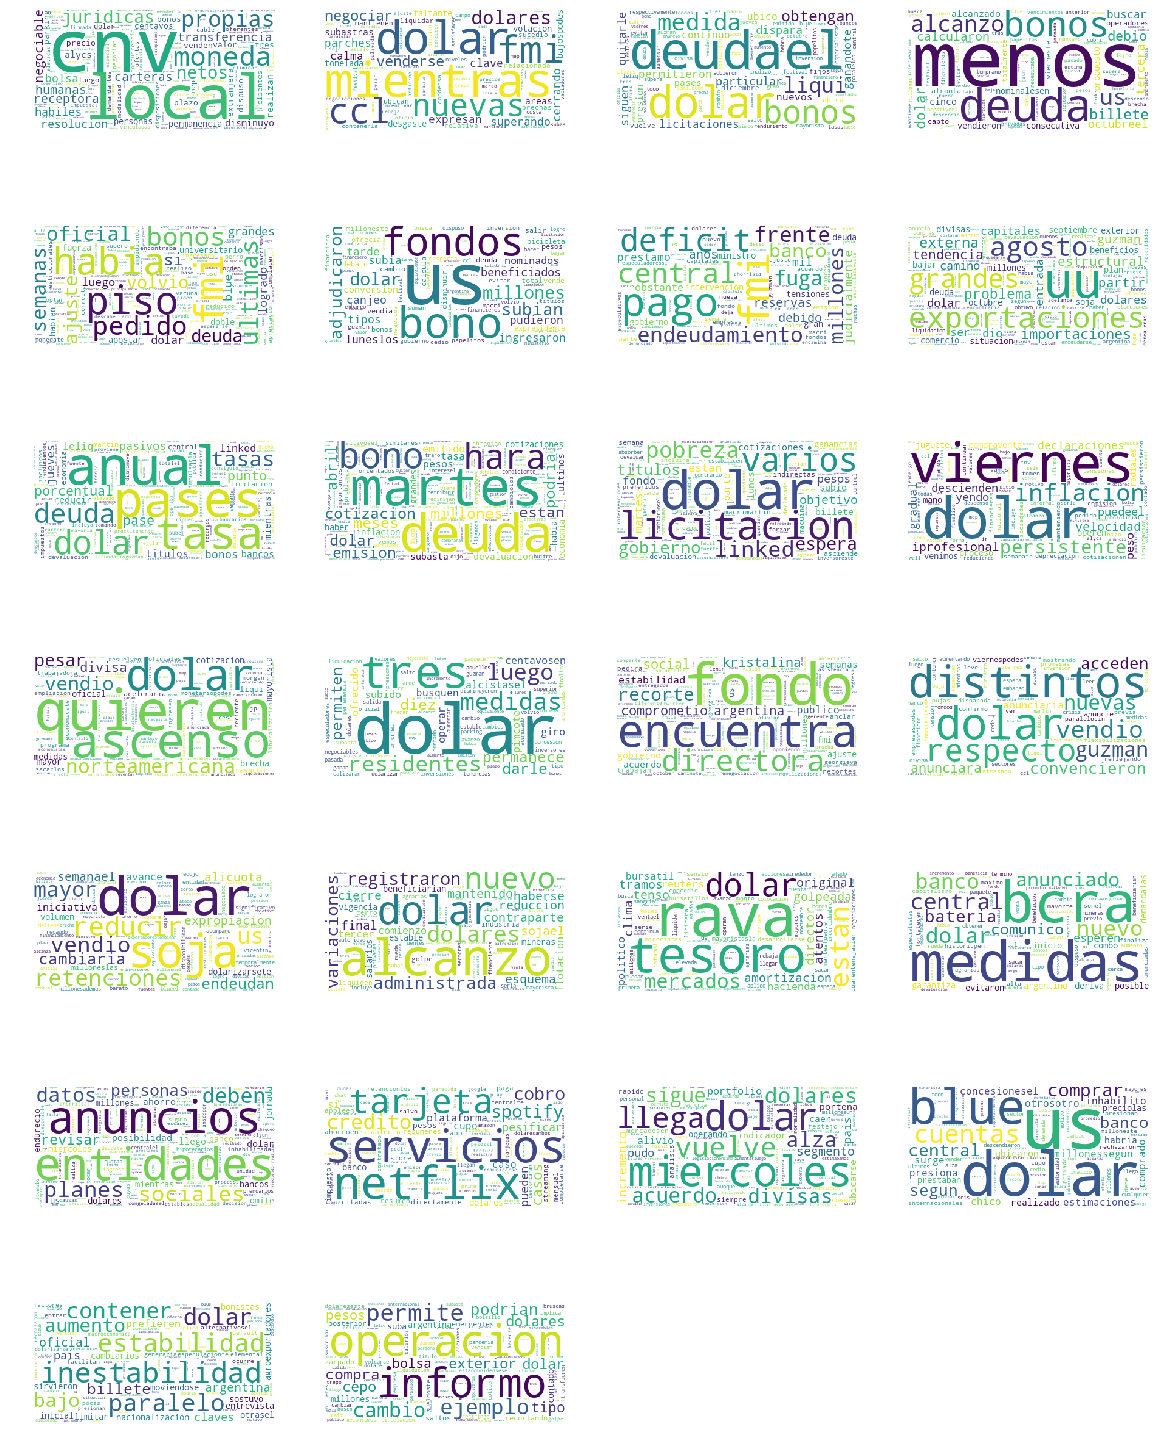

In [87]:
for row in range(tfidf_ex_df.shape[0]):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tfidf_ex_df.iloc[row].sort_values())
    plt.subplot(9, 4, row + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show() 

#### Tf IDf per topic
See top rated terms amid documents of the same topic

In [115]:
plt.rcParams['figure.figsize'] = [10.4 , 8.8]

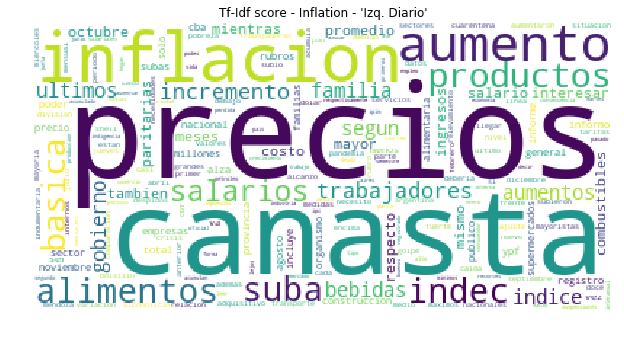

In [116]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(tfidf_inf_df.sum(axis=0).sort_values())
plt.imshow(cloud)
plt.title("Tf-Idf score - Inflation - 'Izq. Diario'")
plt.axis('off')
plt.show()

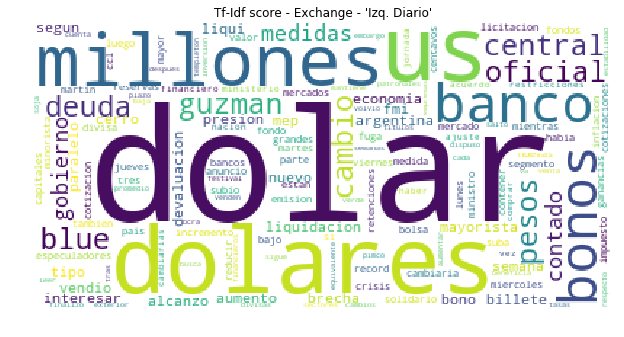

In [117]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(tfidf_ex_df.sum(axis=0).sort_values())
plt.imshow(cloud)
plt.title("Tf-Idf score - Exchange - 'Izq. Diario'")
plt.axis('off')
plt.show()

## Combinations
The linear combinations of vectors describes the whole corpus with fewers tockens and may show latent semantic dimensions.

In [118]:
tfidf = TfidfTransformer().fit_transform(tokens.drop('topics', axis=1))
tfidf_df = pd.DataFrame(tfidf.todense(), columns = tokens.drop('topics', axis=1).columns)

In [119]:
tfidf_df.index = ['inf'+ str(i) for i in range(len(tokens[tokens.topics == 'inflation']))] + ['ex'+ str(i) for i in range(len(tokens[tokens.topics == 'exchange']))]

In [120]:
n_inf_news = len(tokens[tokens.topics == 'inflation'])

### SVD

In [121]:
from sklearn.decomposition import TruncatedSVD

In [122]:
svd = TruncatedSVD(n_components = 2) # n_components = Desired dimensionality of output data. Must be strictly less than the number of features.
p = svd.fit_transform(tfidf_df)
P = np.around(p,3)

#### Plot
matplotlib

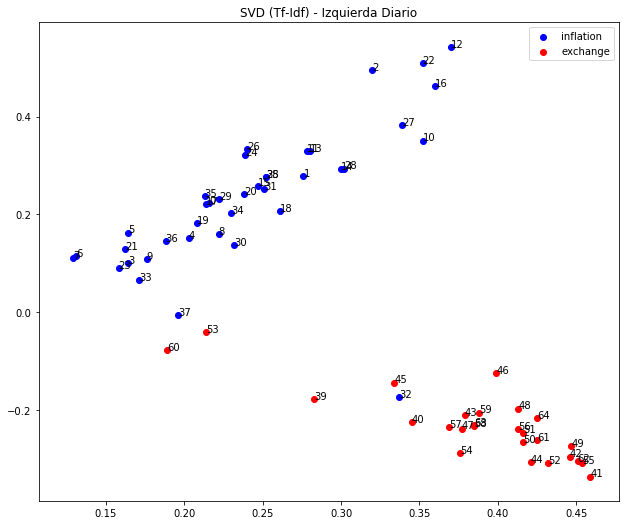

In [124]:
fig, ax = plt.subplots()

ax.scatter(P[:n_inf_news, 0], P[:n_inf_news, 1], c='b')
ax.scatter(P[n_inf_news:, 0], P[n_inf_news:, 1], c='r')

for row in range(len(P)):
    ax.annotate(row, (P[row, 0], P[row, 1]) )

plt.title('SVD (Tf-Idf) - Izquierda Diario')
plt.legend(['inflation', 'exchange'])
plt.show()

plotly

In [125]:
comp1, comp2 = svd.components_

In [126]:
indices1 = np.argsort(comp1)

In [127]:
indices1 = indices1[::-1]
indices1[:20]

array([1066, 2502, 1068, 3259,  483, 2050,  315,  354,  405, 1665,  392,
       2233, 1525,  540,  471, 3024,  733,  980, 1489, 1641])

In [128]:
indices2 = np.argsort(comp2)
indices2 = indices2[::-1]

In [129]:
indices2[:20]

array([ 483, 2502, 1641,  367,  159, 1352, 1665, 2588, 2902, 3186, 3024,
        524,  376, 2901,  155, 3246, 1647, 2333, 3176,  316])

In [130]:
dim1 = np.array(tfidf_df.columns)[indices1]
print(f'Dimensión 1:\n{dim1[:50]}')

Dimensión 1:
['dolar' 'precios' 'dolares' 'us' 'canasta' 'millones' 'aumento' 'banco'
 'bonos' 'inflacion' 'blue' 'oficial' 'guzman' 'central' 'cambio' 'suba'
 'contado' 'deuda' 'gobierno' 'indec' 'pesos' 'alimentos' 'medidas'
 'mayorista' 'segun' 'incremento' 'basica' 'productos' 'mep' 'brecha'
 'tipo' 'salarios' 'trabajadores' 'interesar' 'liquidacion' 'economia'
 'alcanzo' 'mayor' 'ultimos' 'presion' 'familia' 'cerro' 'mientras'
 'tambien' 'bono' 'vendio' 'octubre' 'mismo' 'mercado' 'subio']


In [131]:
dim2 = np.array(tfidf_df.columns)[indices2]
print(f'Dimensión 2:\n{dim2[:50]}')

Dimensión 2:
['canasta' 'precios' 'indec' 'basica' 'alimentos' 'familia' 'inflacion'
 'productos' 'salarios' 'trabajadores' 'suba' 'cba' 'bebidas' 'salario'
 'alimentaria' 'ultimos' 'indice' 'paritarias' 'total' 'aumentos'
 'ingresos' 'registro' 'meses' 'mismo' 'cbt' 'organismo' 'ser' 'aumento'
 'incremento' 'necesito' 'octubre' 'provincia' 'respecto' 'menores'
 'transporte' 'deberia' 'alza' 'segun' 'rubros' 'indumentaria' 'solo'
 'costo' 'construccion' 'adquisitivo' 'incluye' 'minimos' 'menos' 'va'
 'ate' 'necesidades']


### PCA

In [132]:
from sklearn.decomposition import PCA

In [133]:
pca = PCA(n_components=2).fit(tfidf_df)
pca_tfidf = pca.transform(tfidf_df)

#### Plot

matplotlib

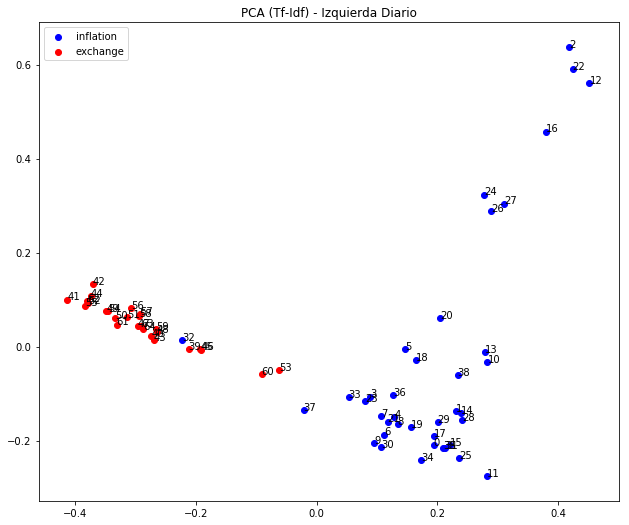

In [134]:
fig, ax = plt.subplots()

ax.scatter(pca_tfidf[:n_inf_news, 0], pca_tfidf[:n_inf_news, 1], c='b')
ax.scatter(pca_tfidf[n_inf_news:, 0], pca_tfidf[n_inf_news:, 1], c='r')

for row in range(len(pca_tfidf)):
    ax.annotate(row, (pca_tfidf[row, 0], pca_tfidf[row, 1]) )

plt.title('PCA (Tf-Idf) - Izquierda Diario')
plt.legend(['inflation', 'exchange'])
plt.show()

plotly

In both linear combinations, document num 32 appears to be wrong classified.

In [107]:
tokens.drop('topics', axis=1).iloc[25].sort_values(ascending=False)[:20]

productos      8
precios        4
indice         3
suba           3
julio          3
ataques        2
salario        2
textiles       2
mayorista      2
incremento     2
inflacion      2
despidos       2
ultimos        2
subieron       2
registraron    1
anossegun      1
adquisitivo    1
internos       1
poder          1
minorista      1
Name: doc26, dtype: int64

In [108]:
data = pickle.load(open('data/df_clean_izq.pkl','rb'))
data.iloc[32].flyer

'INFLACION '

In [109]:
data.iloc[32].headline

'Precios sin control: alimentos y bebidas suben 12,4% durante el año en Jujuy'

Article num 32 was clearly wrong classified.

In [110]:
data.drop(index=32, axis=0, inplace=True)

In [111]:
data.reset_index(drop=True, inplace=True)

In [112]:
pickle.dump(data, open( "data/df_clean_izq.pkl", "wb" ))